In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



C:\Users\arao86\AppData\Local\Temp\ipykernel_21400\4218804806.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [95]:
data=pd.read_csv('Live.csv')

In [96]:
data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [97]:
data=data.dropna(axis=1)

In [98]:
data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [100]:
data.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [101]:
data=data.drop(columns=['status_id','status_published'])

In [102]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

data['status_type']=le.fit_transform(data['status_type'])

In [103]:
data.describe()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,1.704965,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,0.942399,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [104]:
data

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


In [105]:
from sklearn.preprocessing import MinMaxScaler

nm=MinMaxScaler()
x=nm.fit_transform(data)

In [106]:
x

array([[1.00000000e+00, 1.12314225e-01, 2.43925679e-02, ...,
        6.36942675e-03, 1.96078431e-02, 0.00000000e+00],
       [3.33333333e-01, 3.18471338e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.81953291e-02, 1.12434493e-02, ...,
        6.36942675e-03, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.33333333e-01, 4.24628450e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 7.45222930e-02, 5.71700810e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 3.60934183e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [107]:
data=pd.DataFrame(x,columns=data.columns)

In [108]:
data.describe()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,0.568322,0.048857,0.010689,0.011689,0.045657,0.019374,0.004638,0.004436,0.004778,0.003651
std,0.314133,0.098222,0.042384,0.038435,0.095429,0.060842,0.031366,0.025205,0.031317,0.023446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.003609,0.000000,0.000000,0.003609,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.333333,0.012633,0.000191,0.000000,0.012314,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.046497,0.001096,0.001168,0.039225,0.004566,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
data

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
7045,0.333333,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0
7046,0.333333,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0
7047,0.333333,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0
7048,0.333333,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0


In [110]:
from sklearn.cluster import KMeans

In [231]:
inertia=[]
xline=[]
for i in range(1,5):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data.iloc[:,1:])
    xline.append(i)
    inertia.append(kmeans.inertia_)

In [232]:
kmeans.cluster_centers_


array([[ 2.11574749e-02,  7.43832172e-03,  8.02452680e-03,
         1.90977786e-02,  1.28291164e-02,  1.87473283e-03,
         2.97837133e-03,  3.93210381e-03,  2.61510542e-03],
       [ 4.81578202e-01,  3.09399034e-03,  3.87600134e-03,
         4.80258821e-01,  5.49394796e-03,  8.54744776e-03,
         1.33454656e-03,  3.73482726e-04, -9.97465999e-18],
       [ 2.35234634e-01,  1.69609460e-01,  1.86140816e-01,
         1.81381676e-01,  3.20844554e-01,  9.90130972e-02,
         7.12885840e-02,  4.72599296e-02,  5.47973532e-02],
       [ 2.04298767e-01,  3.30588135e-03,  4.98628321e-03,
         2.01907846e-01,  1.17917671e-02,  1.00941719e-02,
         2.88055536e-03,  3.80039656e-03,  1.81225082e-03]])

In [233]:
kmeans.inertia_


63.39367439722785

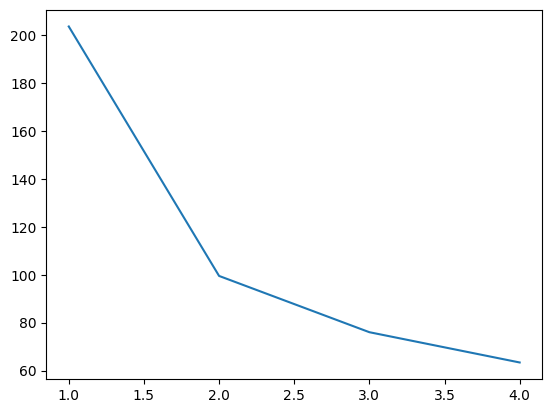

In [234]:
plt.plot(xline,inertia)

In [235]:
labels = kmeans.labels_


In [236]:
inertia

[203.5691288576309, 99.50082638379924, 76.02453718052368, 63.39367439722785]

In [237]:
arr=np.array(data)
arr=arr.reshape(-1, 10)
arr.shape

(7050, 10)

In [238]:
kmeans.cluster_centers_

array([[ 2.11574749e-02,  7.43832172e-03,  8.02452680e-03,
         1.90977786e-02,  1.28291164e-02,  1.87473283e-03,
         2.97837133e-03,  3.93210381e-03,  2.61510542e-03],
       [ 4.81578202e-01,  3.09399034e-03,  3.87600134e-03,
         4.80258821e-01,  5.49394796e-03,  8.54744776e-03,
         1.33454656e-03,  3.73482726e-04, -9.97465999e-18],
       [ 2.35234634e-01,  1.69609460e-01,  1.86140816e-01,
         1.81381676e-01,  3.20844554e-01,  9.90130972e-02,
         7.12885840e-02,  4.72599296e-02,  5.47973532e-02],
       [ 2.04298767e-01,  3.30588135e-03,  4.98628321e-03,
         2.01907846e-01,  1.17917671e-02,  1.00941719e-02,
         2.88055536e-03,  3.80039656e-03,  1.81225082e-03]])

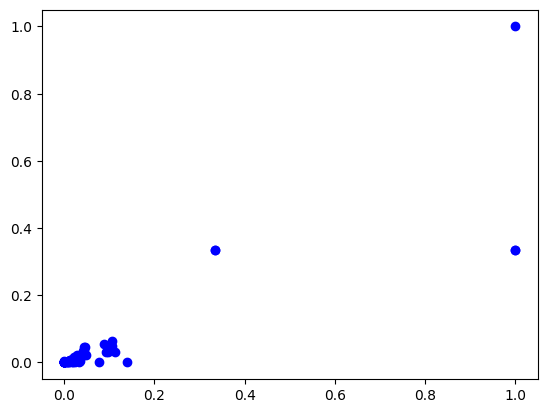

In [240]:
plt.scatter(arr[0],arr[1],c='blue')
plt.scatter(arr[2],arr[3],c='blue')
plt.scatter(arr[4],arr[5],c='blue')
plt.scatter(arr[6],arr[7],c='blue')
plt.scatter(arr[8],arr[9],c='blue')
# plt.scatter(kmeans.cluster_centers_[:, 0], 
#             kmeans.cluster_centers_[:, 1], 
#             s=200,                             # Set centroid size
#             c='red')  
plt.show()

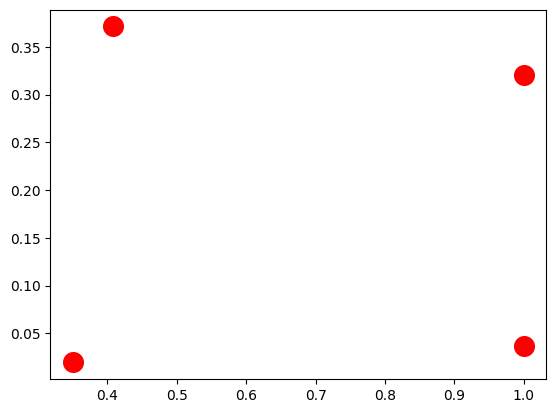

           a         b         c         d         e         f
0  -1.423533 -0.176718 -0.010740 -0.938532 -0.493873  0.710667
1  -0.761866 -0.516352 -1.587821 -0.336308  0.743803 -0.414002
2  -0.811664  0.922752 -0.887752  0.783149 -0.028239 -1.945161
3  -0.016897 -1.910900  1.037729  1.347085 -1.115819  0.130066
4   0.493457 -0.099506 -1.190531 -0.933581  0.062049  0.194913
..       ...       ...       ...       ...       ...       ...
95 -0.180478  0.714257 -2.152120  0.939905  1.600988  0.434498
96 -2.232391  0.678162  0.345399 -0.376855  0.022211 -0.813400
97 -0.337026 -1.118893 -0.838262  0.781525 -0.152413  0.326115
98 -0.025997  0.225796 -0.556153  0.704525 -0.345528  0.669647
99  0.310115 -0.479058 -0.339262 -1.362276  0.440031  0.159770

[100 rows x 6 columns]


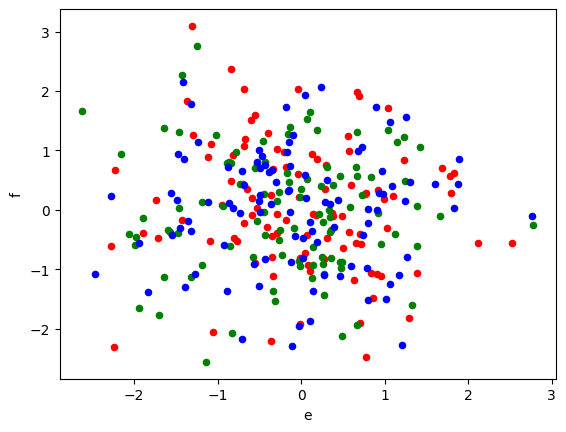

In [192]:
df = pd.DataFrame(np.random.randn(100, 6), columns=['a', 'b', 'c', 'd', 'e', 'f'])


ax1 = df.plot(kind='scatter', x='a', y='b', color='r')    
ax2 = df.plot(kind='scatter', x='c', y='d', color='g', ax=ax1)    
ax3 = df.plot(kind='scatter', x='e', y='f', color='b', ax=ax1)

In [195]:
import hvplot.pandas

df = pd.DataFrame(np.random.randn(100, 6), columns=['a', 'b', 'c', 'd', 'e', 'f'])

df.havplot(x='a', y=['b', 'c', 'd', 'e'], kind='scatter')

ModuleNotFoundError: No module named 'hvplot'

In [2]:
from sklearn.cluster import KMeans

In [65]:
data=pd.read_csv('Mall_Customers.csv')

In [66]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [68]:
data=data.drop(columns='Genre')

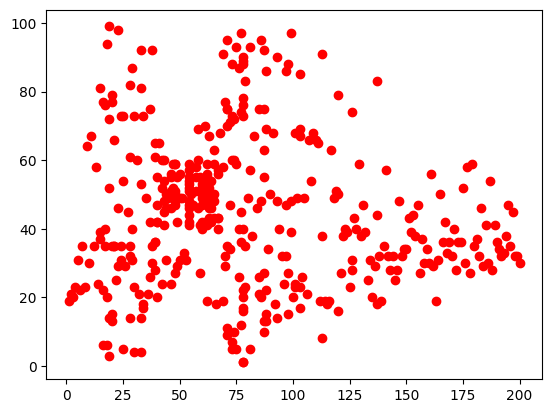

In [69]:
plt.scatter(data['CustomerID'],data['Age'],c='red')
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'],c='red')

In [70]:
inertia=[]
xline=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data.iloc[:,1:])
    xline.append(i)
    inertia.append(kmeans.inertia_)

In [71]:
inertia

[308812.77999999997,
 212840.16982097187,
 157680.61387631978,
 109997.08872264271,
 82608.63809385583,
 58338.70237980936,
 51525.77377037377,
 51529.250975030714,
 45282.09221144658]

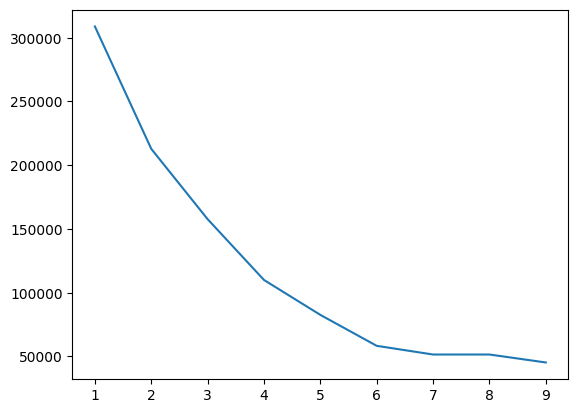

In [72]:
plt.plot(xline,inertia)

In [73]:
from sklearn.preprocessing import MinMaxScaler

nm=MinMaxScaler()
datanm=nm.fit_transform(data)

In [74]:
datanm

array([[0.        , 0.01923077, 0.        , 0.3877551 ],
       [0.00502513, 0.05769231, 0.        , 0.81632653],
       [0.01005025, 0.03846154, 0.00819672, 0.05102041],
       [0.01507538, 0.09615385, 0.00819672, 0.7755102 ],
       [0.0201005 , 0.25      , 0.01639344, 0.39795918],
       [0.02512563, 0.07692308, 0.01639344, 0.76530612],
       [0.03015075, 0.32692308, 0.02459016, 0.05102041],
       [0.03517588, 0.09615385, 0.02459016, 0.94897959],
       [0.04020101, 0.88461538, 0.03278689, 0.02040816],
       [0.04522613, 0.23076923, 0.03278689, 0.7244898 ],
       [0.05025126, 0.94230769, 0.03278689, 0.13265306],
       [0.05527638, 0.32692308, 0.03278689, 1.        ],
       [0.06030151, 0.76923077, 0.04098361, 0.14285714],
       [0.06532663, 0.11538462, 0.04098361, 0.7755102 ],
       [0.07035176, 0.36538462, 0.04098361, 0.12244898],
       [0.07537688, 0.07692308, 0.04098361, 0.79591837],
       [0.08040201, 0.32692308, 0.04918033, 0.34693878],
       [0.08542714, 0.03846154,

In [75]:
datanm=pd.DataFrame(datanm,columns=data.columns)

In [76]:
datanm

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.019231,0.000000,0.387755
1,0.005025,0.057692,0.000000,0.816327
2,0.010050,0.038462,0.008197,0.051020
3,0.015075,0.096154,0.008197,0.775510
4,0.020101,0.250000,0.016393,0.397959
...,...,...,...,...
195,0.979899,0.326923,0.860656,0.795918
196,0.984925,0.519231,0.909836,0.275510
197,0.989950,0.269231,0.909836,0.744898
198,0.994975,0.269231,1.000000,0.173469


In [77]:
import numpy as np

In [78]:
inertia=[]
xline=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(datanm.iloc[:,1:])
    xline.append(i)
    inertia.append(kmeans.inertia_)

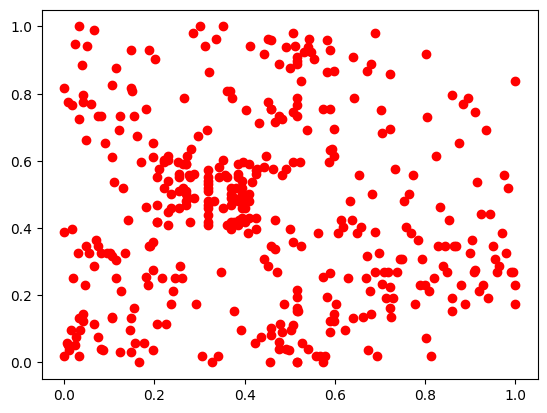

In [79]:
plt.scatter(datanm['CustomerID'],datanm['Age'],c='red')
plt.scatter(datanm['Annual Income (k$)'],datanm['Spending Score (1-100)'],c='red')


In [80]:
inertia

[37.40148216035944,
 22.560774882609756,
 18.016508935395287,
 12.650287676229912,
 12.188183416793816,
 8.410371024636293,
 7.194627451966417,
 6.3962157536077235,
 5.9382348222500525]

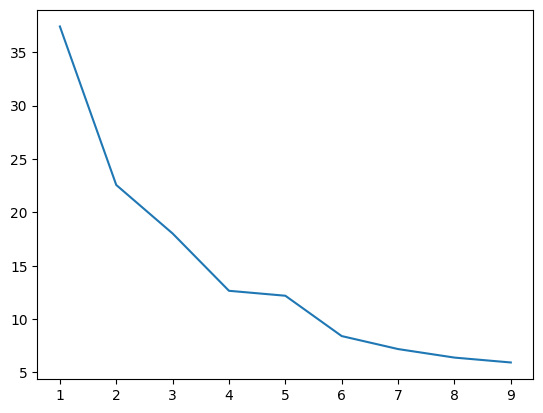

In [81]:
plt.plot(xline,inertia)

In [82]:
kmeans=KMeans(n_clusters=4)
kmeans.fit_predict(datanm)
kmeans.cluster_centers_[0]
kmeans.inertia_

17.311431708503733

In [83]:
kmeans=KMeans(n_clusters=4)
kmeans.fit_predict(data)
kmeans.cluster_centers_[0]
kmeans.inertia_

195352.47984407304

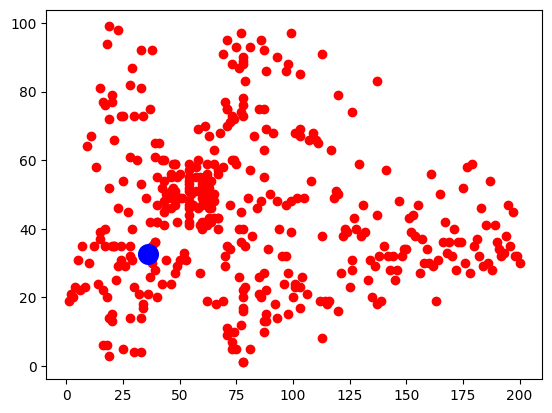

In [84]:
plt.scatter(data['CustomerID'],data['Age'],c='red')
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'],c='red')
plt.scatter(kmeans.cluster_centers_[0][1], 
            kmeans.cluster_centers_[1][1], 
            s=200,                             # Set centroid size
            c='blue')  
# plt.scatter(kmeans.cluster_centers_[2], 
#             kmeans.cluster_centers_[3], 
#             s=200,                             # Set centroid size
#             c='black') 

In [85]:
kmeans = KMeans(n_clusters = 2)
y_kmeans = kmeans.fit_predict(datanm)


In [86]:
vall=datanm

In [87]:
temp=vall
datanm=temp.iloc[:, [0, 1, 2, 3]].values

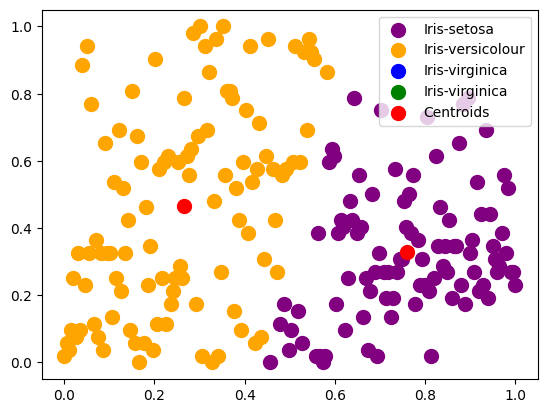

In [88]:
plt.scatter(datanm[y_kmeans == 0, 0], datanm[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(datanm[y_kmeans == 1, 0], datanm[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(datanm[y_kmeans == 2, 0], datanm[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')
plt.scatter(datanm[y_kmeans == 3, 0], datanm[y_kmeans == 3, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [61]:
datanm=vall